In [ ]:
  #se cargan las librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# **Ejercicio PCA**

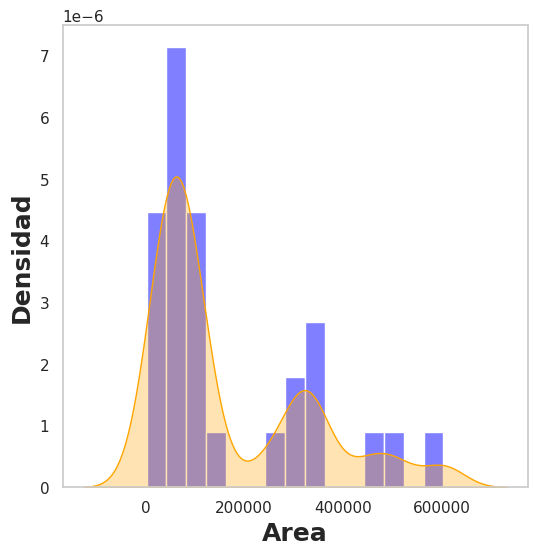

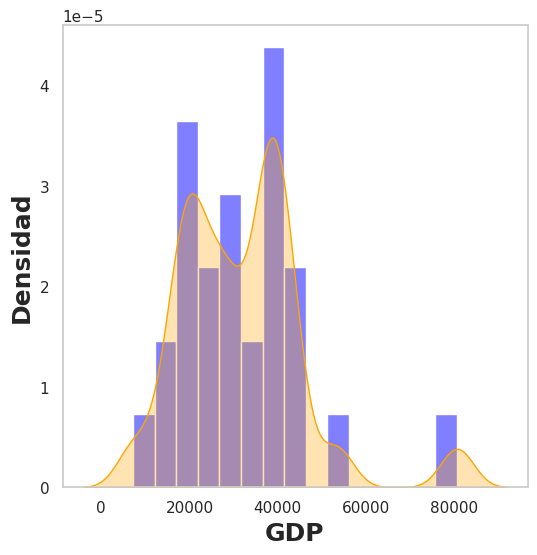

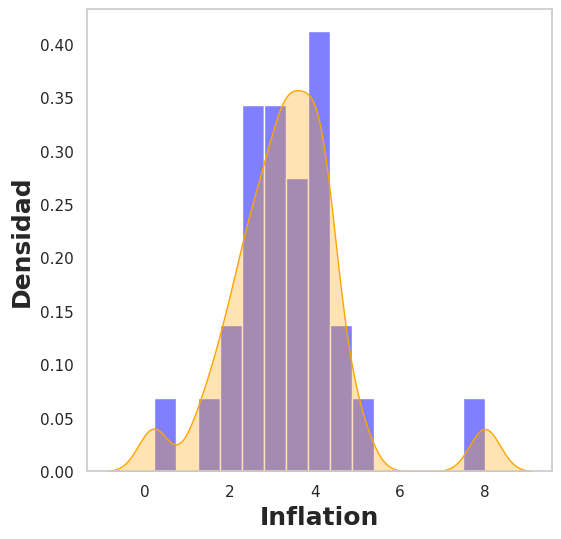

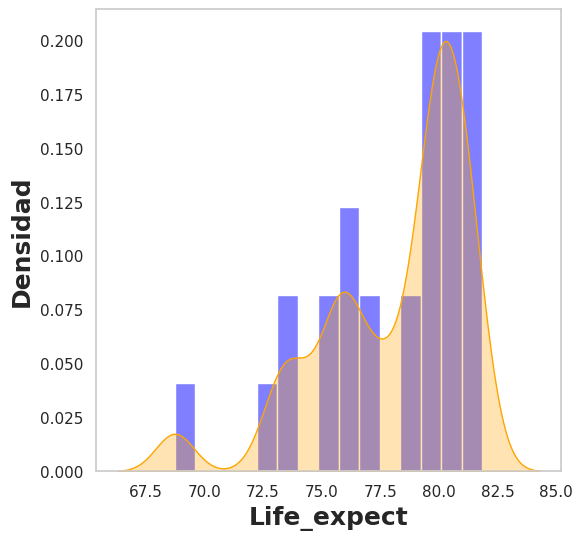

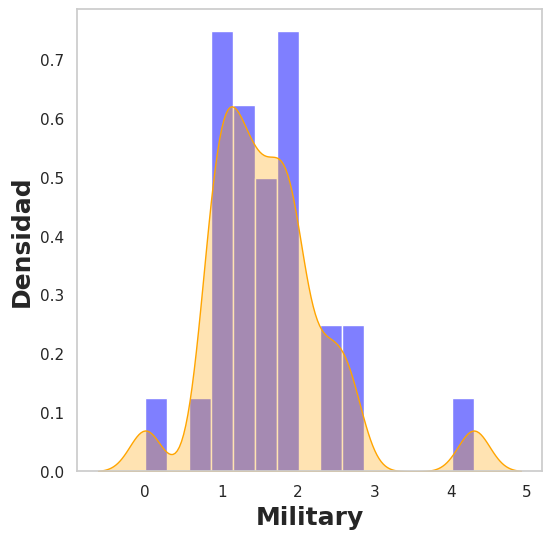

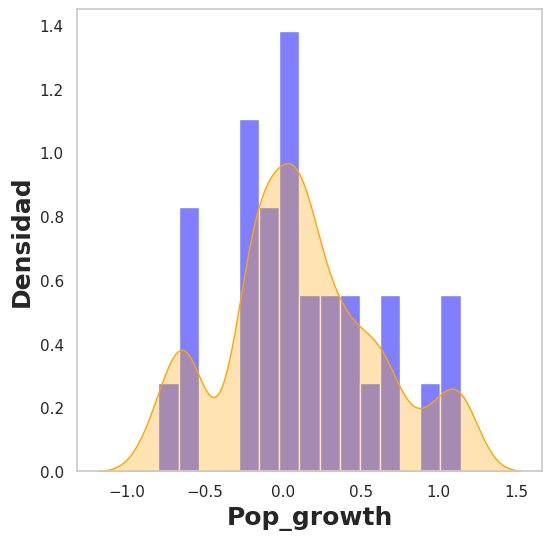

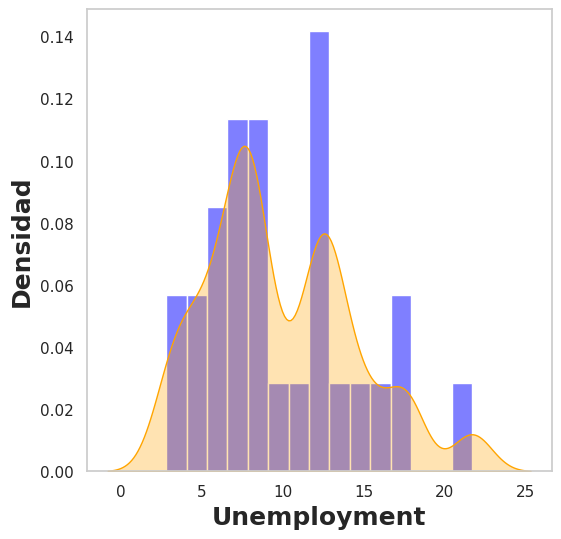

In [ ]:
#se cargan los datos y se crea el dataframe
data = {
    "Country": [
        "Austria", "Belgium", "Bulgaria", "Croatia", "Czech Republic", "Denmark",
        "Estonia", "Finland", "Germany", "Greece", "Hungary", "Iceland", "Ireland",
        "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", "Norway",
        "Poland", "Portugal", "Slovakia", "Slovenia", "Spain", "Sweden",
        "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Area": [
        83871, 30528, 110879, 56594, 78867, 43094,
        45228, 338145, 357022, 131957, 93028, 103000, 70273,
        301340, 64589, 65300, 2586, 41543, 323802,
        312685, 92090, 49035, 20273, 505370, 450295,
        41277, 603550, 243610
    ],
    "GDP": [
        41600, 37800, 13800, 18000, 27100, 37000,
        20400, 36000, 38100, 26300, 19600, 38100, 40800,
        30500, 16800, 19100, 80600, 42000, 53400,
        20200, 23400, 23300, 28800, 30500, 40700,
        44500, 7200, 36500
    ],
    "Inflation": [
        3.5, 3.5, 4.2, 2.3, 1.9, 2.8,
        5, 3.3, 2.5, 3.3, 3.9, 4, 2.6,
        2.9, 4.4, 4.1, 3.4, 2.3, 1.3,
        4.2, 3.7, 3.9, 1.8, 3.1, 3,
        0.2, 8, 4.5
    ],
    "Life_expect": [
        79.91, 79.65, 73.84, 75.99, 77.38, 78.78,
        73.58, 79.41, 80.19, 80.05, 75.02, 81, 80.32,
        81.86, 72.93, 75.55, 79.75, 80.91, 80.32,
        76.25, 78.7, 76.03, 77.48, 81.27, 81.18,
        81.17, 68.74, 80.17
    ],
    "Military": [
        0.8, 1.3, 2.6, 2.39, 1.15, 1.3,
        2, 2, 1.5, 4.3, 1.75, 0, 0.9,
        1.8, 1.1, 0.9, 0.9, 1.6, 1.9,
        1.9, 2.3, 1.08, 1.7, 1.2, 1.5,
        1, 1.4, 2.7
    ],
    "Pop_growth": [
        0.03, 0.06, -0.8, -0.09, -0.13, 0.24,
        -0.65, 0.07, -0.2, 0.06, -0.18, 0.67, 1.11,
        0.38, -0.6, -0.28, 1.14, 0.45, 0.33,
        -0.08, 0.18, 0.1, -0.19, 0.65, 0.17,
        0.92, -0.63, 0.55
    ],
    "Unemployment": [
        4.2, 7.2, 9.6, 17.7, 8.5, 6.1,
        12.5, 7.8, 6, 17.4, 10.9, 7.4, 14.4,
        8.4, 12.8, 15.4, 5.7, 4.4, 3.3,
        12.4, 12.7, 13.2, 11.8, 21.7, 7.5,
        2.8, 7.9, 8.1
    ]
}

df = pd.DataFrame(data)
#se extrae las variables
variables = df.columns[1:].to_numpy()

sns.set(style="whitegrid")
for variable in variables:
    plt.figure(figsize=(6, 6))


    sns.histplot(df[variable], bins=15, kde=False, stat="density", color='blue', alpha=0.5, label='Histograma')

    sns.kdeplot(df[variable], bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')


    plt.xlabel(variable,fontweight='bold', fontsize=18)
    plt.ylabel('Densidad', fontweight='bold', fontsize=18)
    plt.grid()
    plt.show()


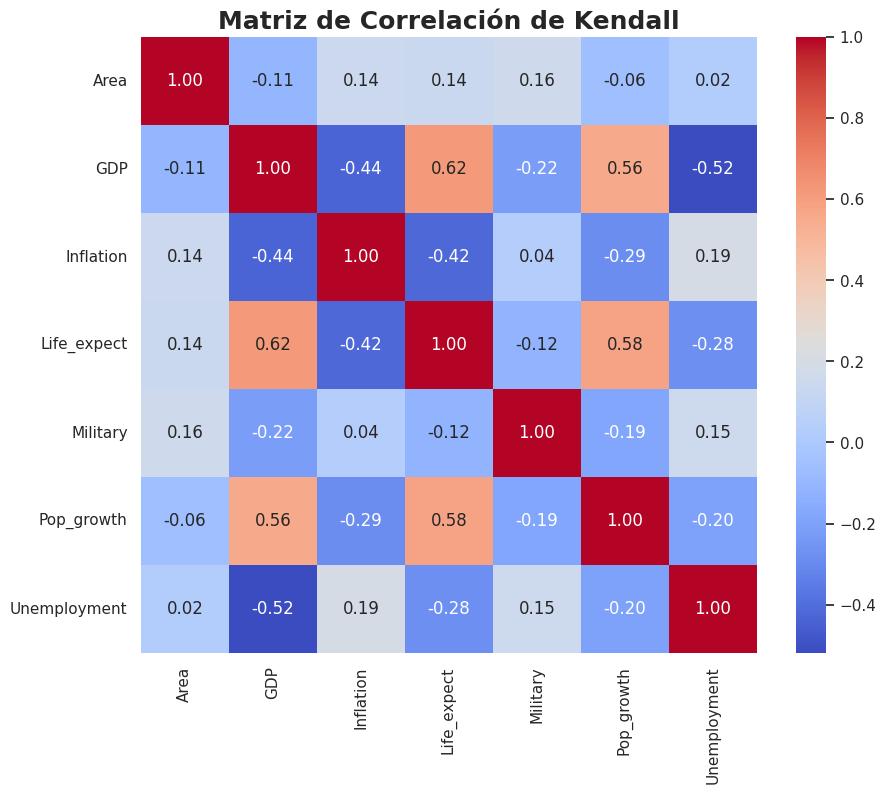

In [ ]:
#se realiza las matrices de correlación

correlation_matrix = df.drop(columns=["Country"]).corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación de Kendall', fontweight='bold', fontsize=18)
plt.show()

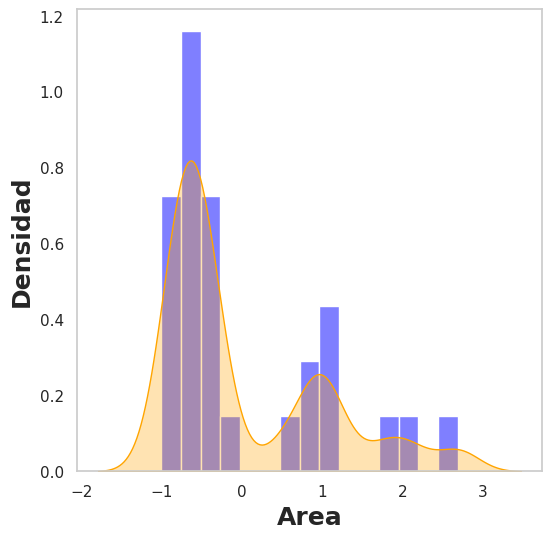

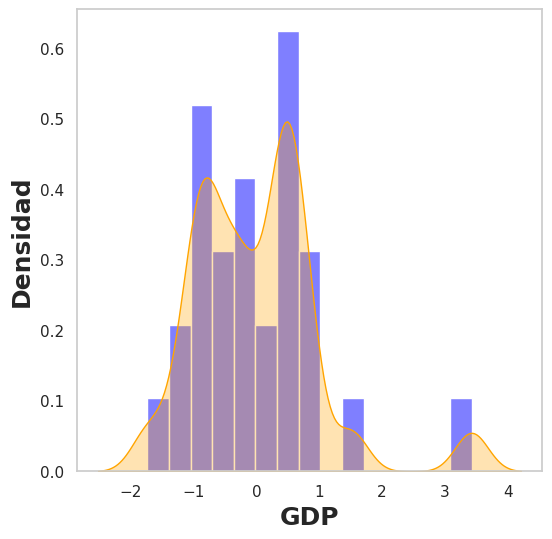

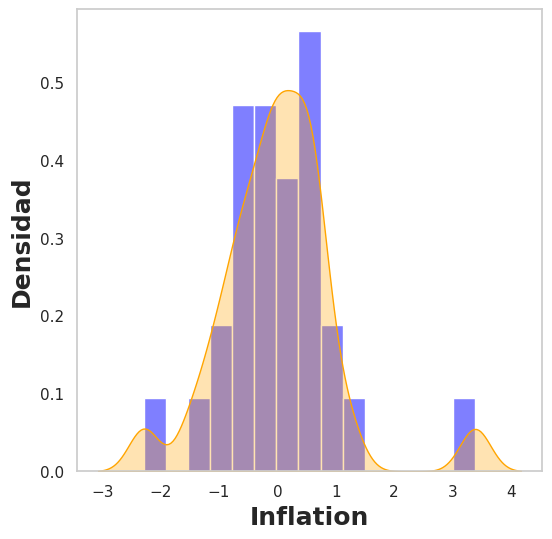

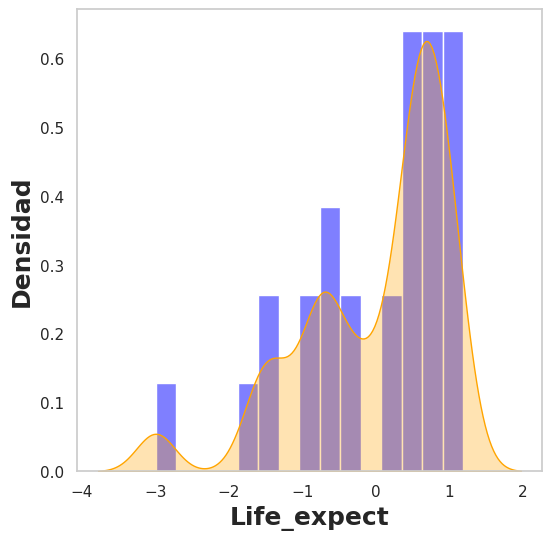

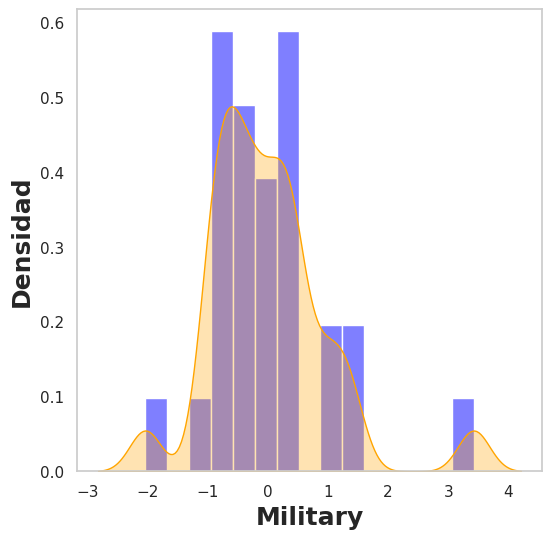

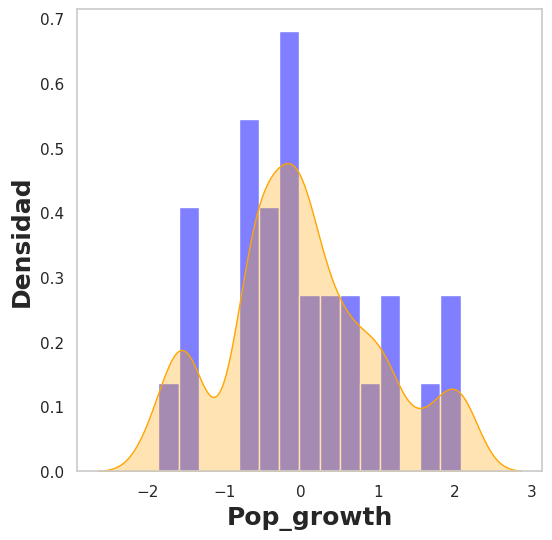

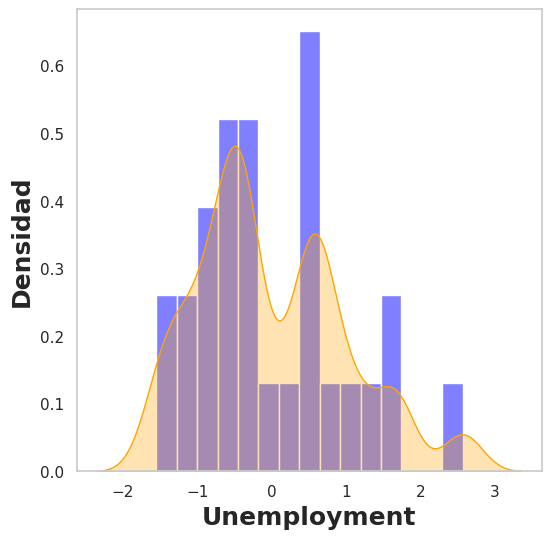

In [ ]:
#se estandariza estandar

X = df.drop(columns=["Country"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Se crea un nuevo DataFrame con los datos escalados
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

for variable in scaled_df.columns:
    plt.figure(figsize=(6, 6))


    sns.histplot(scaled_df[variable], bins=15, kde=False, stat="density", color='blue', alpha=0.5, label='Histograma')


    sns.kdeplot(scaled_df[variable], bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')


    plt.xlabel(variable,fontweight='bold', fontsize=18)
    plt.ylabel('Densidad', fontweight='bold', fontsize=18)
    plt.grid()
    plt.show()

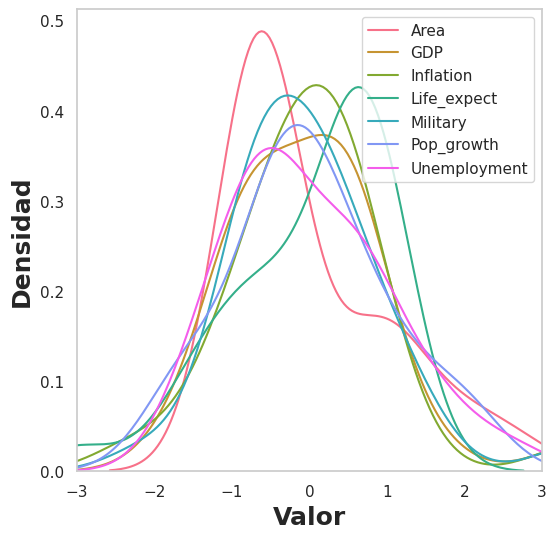

In [ ]:
#se grafica la distirbución de todos los atributos
colores = sns.color_palette("husl", len(variables))
plt.figure(figsize=(6, 6))

for i, variable in enumerate(variables):

    sns.kdeplot(scaled_df[variable], color=colores[i], label=variable)

plt.xlabel('Valor', fontweight='bold', fontsize=18)
plt.ylabel('Densidad', fontweight='bold', fontsize=18)
plt.xlim(-3,3)
plt.legend()
plt.grid()
plt.show()

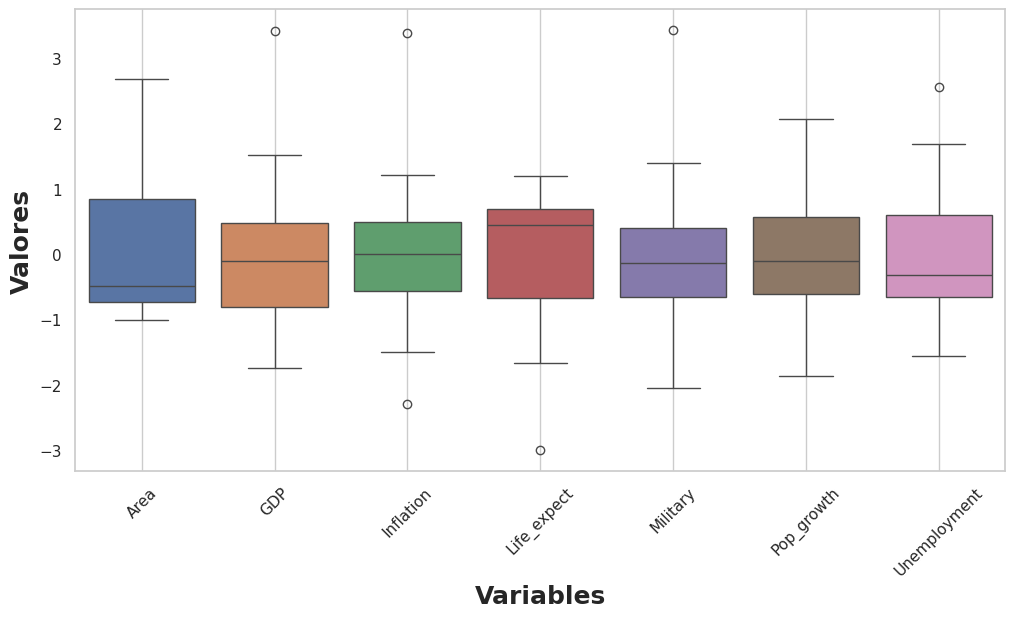

In [ ]:
#se hace el grafico de caja de los datos escalados
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df,native_scale=True)
plt.xlabel('Variables', fontweight='bold', fontsize=18)
plt.ylabel('Valores', fontweight='bold', fontsize=18)
plt.xticks(rotation=45)
plt.grid()
plt.show()

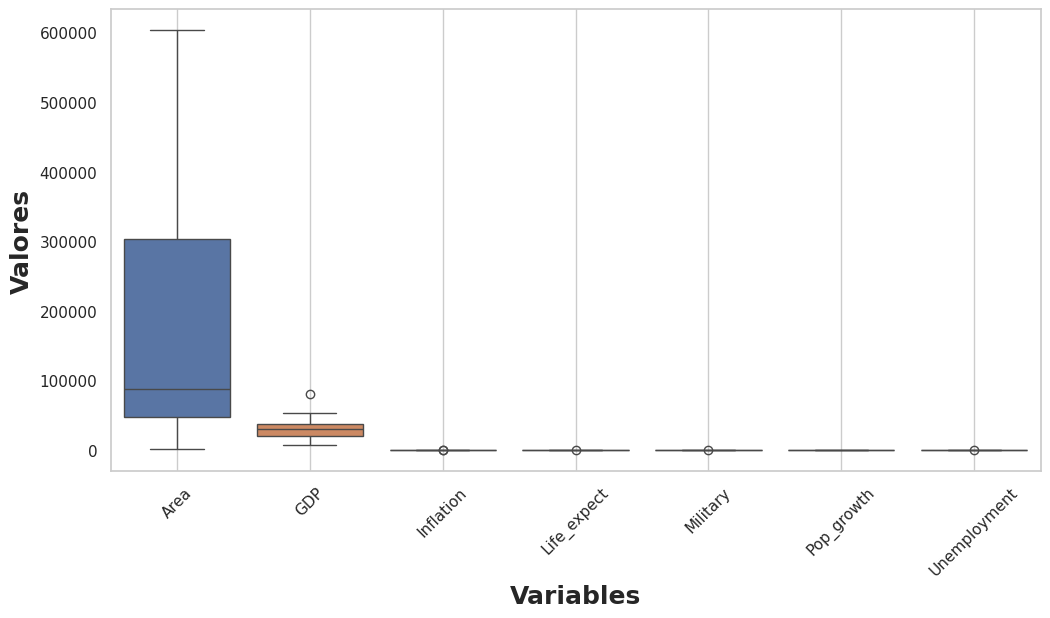

In [ ]:
#se hace el grafico de caja de los datos originales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Country"]))
plt.xlabel('Variables', fontweight='bold', fontsize=18)
plt.ylabel('Valores', fontweight='bold', fontsize=18)
plt.xticks(rotation=45)
plt.grid()
plt.show()

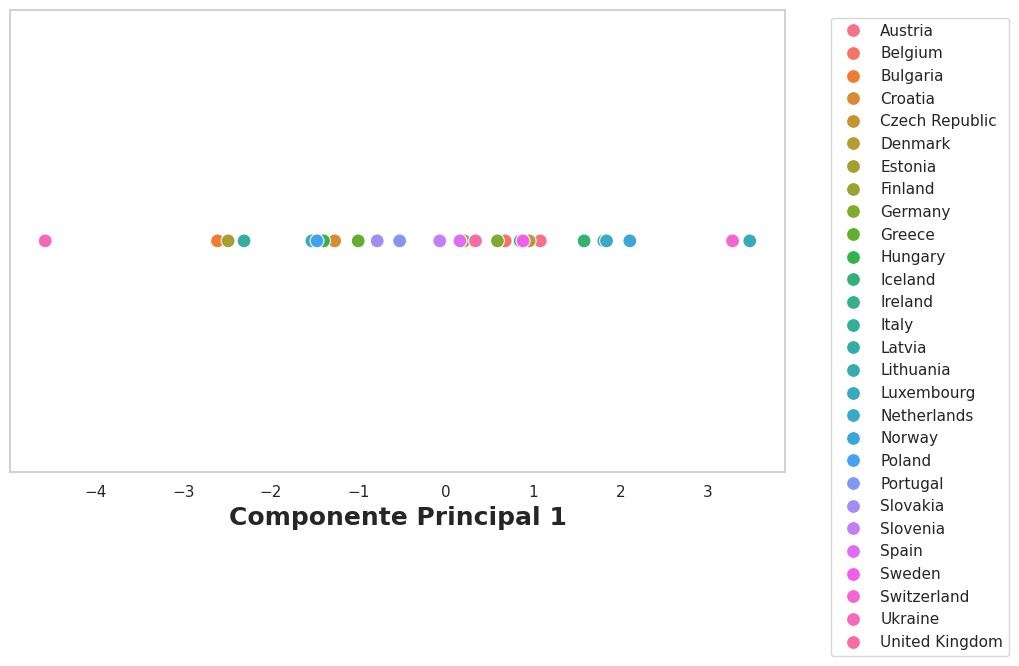

In [ ]:
#se realiza el PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_scaled)

# se crea el  DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1'])
pca_df['Country'] = df['Country']

# Se grafica el resultado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y=np.zeros_like(pca_df['PCA1']), data=pca_df, hue='Country', s=100)
plt.xlabel('Componente Principal 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

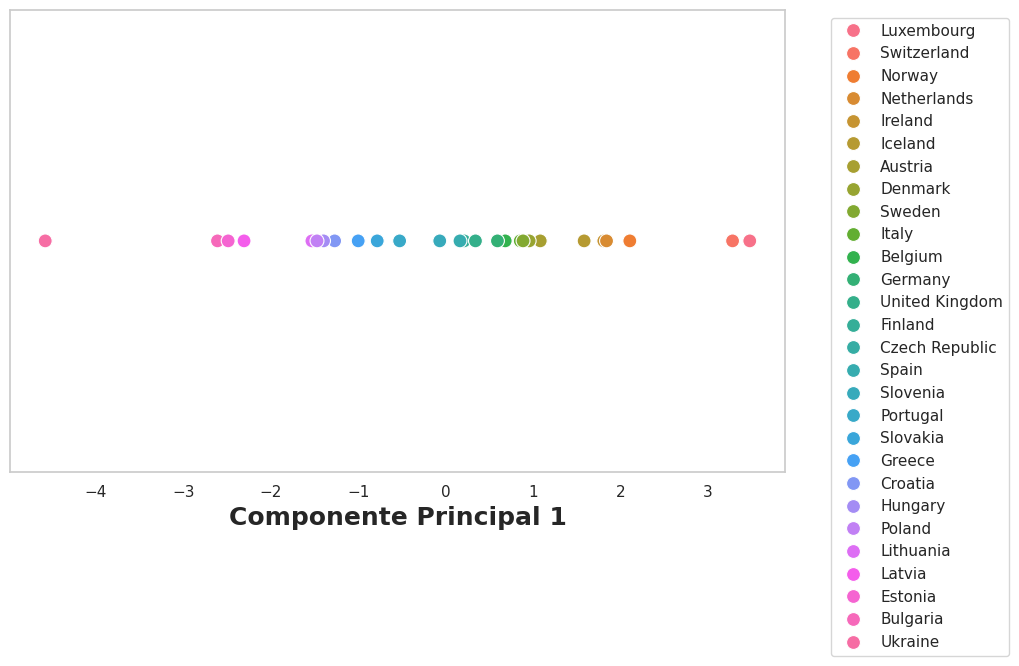

In [ ]:
# Se Calcular el promedio del PCA para ordenarlo de menor a mayor
country_order = pca_df.groupby('Country')['PCA1'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y=np.zeros_like(pca_df['PCA1']), data=pca_df, hue='Country',
                hue_order=country_order, s=100)

plt.xlabel('Componente Principal 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

<ipython-input-11-33920ae7e9de>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')


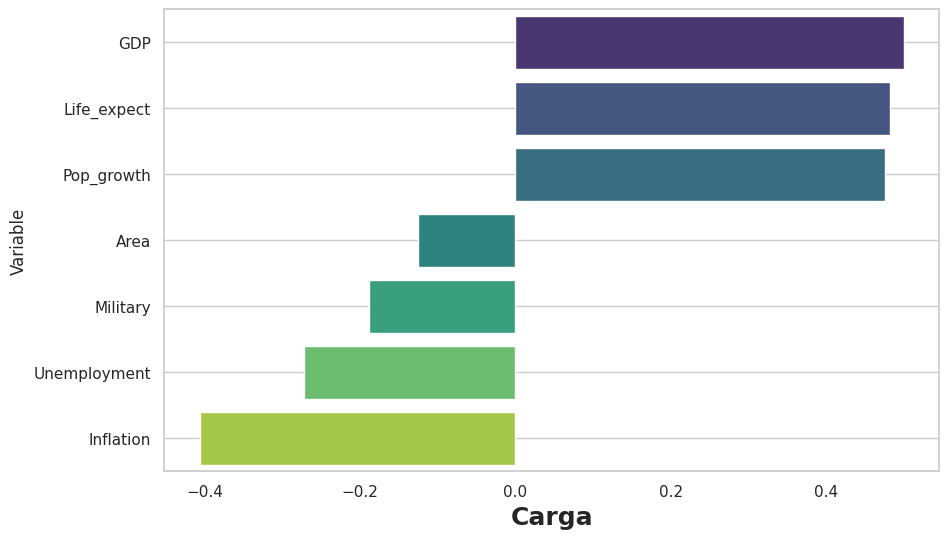

In [ ]:
cargas = pca.components_[0]

# Se Crea un DataFrame para las cargas
cargas_df = pd.DataFrame({'Variable': X.columns, 'Carga': cargas})

cargas_df['Carga'] = cargas_df['Carga']
cargas_df = cargas_df.sort_values(by='Carga', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')
plt.xlabel('Carga', fontweight='bold', fontsize=18)
plt.grid()
plt.show()

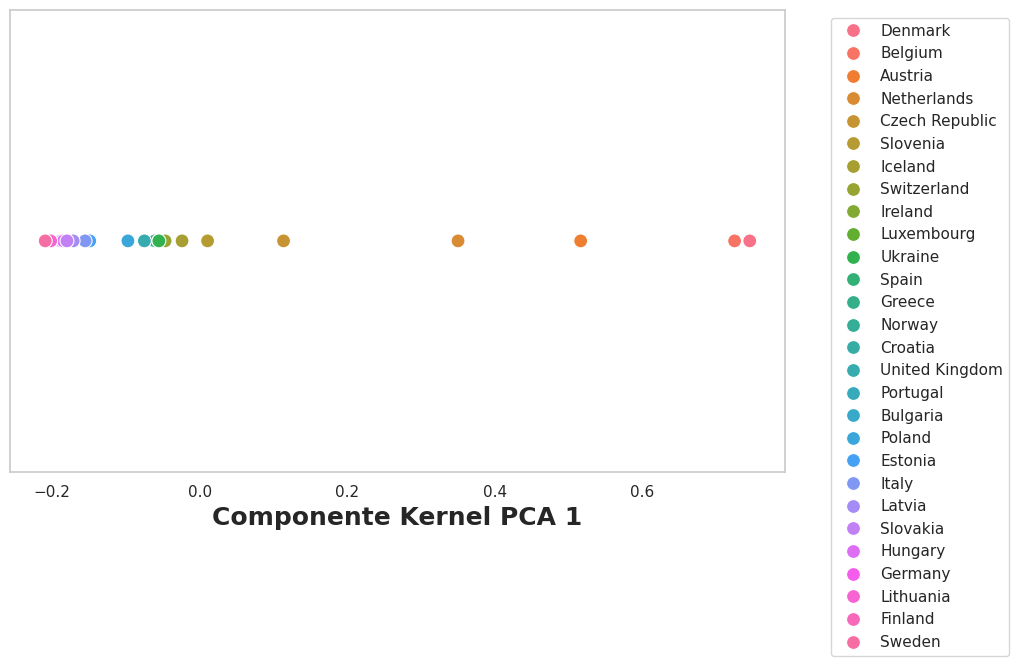

In [ ]:
#se realiza el PCA no lineal
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns

# Se aplicar Kernel PCA con kernel RBF (exponencial)
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=1)
kpca_result = kpca.fit_transform(X_scaled)


kpca_df = pd.DataFrame(data=kpca_result, columns=['Kernel PCA 1'])
kpca_df['Country'] = df['Country']

country_order_kpca = kpca_df.groupby('Country')['Kernel PCA 1'].mean().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kernel PCA 1', y=np.zeros_like(kpca_df['Kernel PCA 1']), data=kpca_df, hue='Country',
                hue_order=country_order_kpca, s=100)

plt.xlabel('Componente Kernel PCA 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


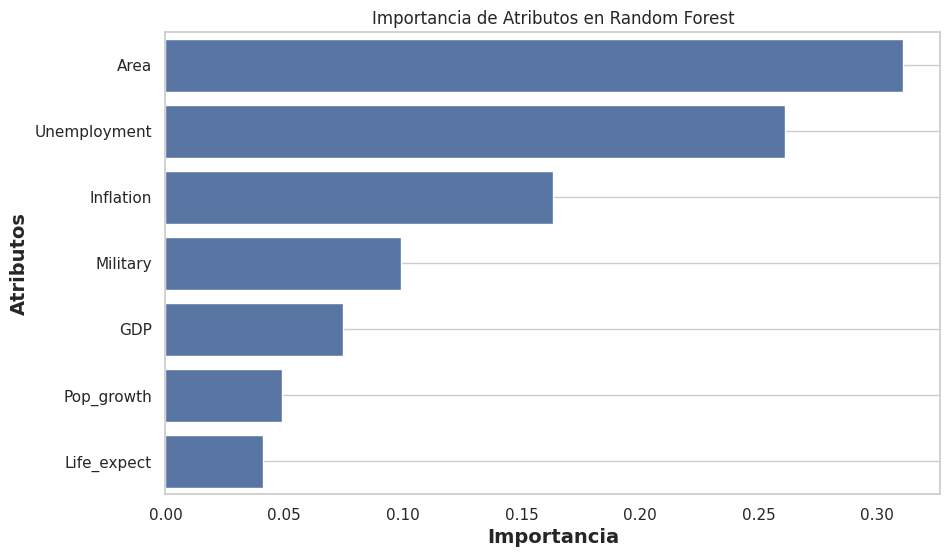

In [ ]:
#se ajusta el PCA no lineal con un modelo de random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_scaled,kpca_result)


importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de Atributos en Random Forest')
plt.xlabel('Importancia', fontweight='bold', fontsize=14)
plt.ylabel('Atributos', fontweight='bold', fontsize=14)
plt.grid()
plt.show()

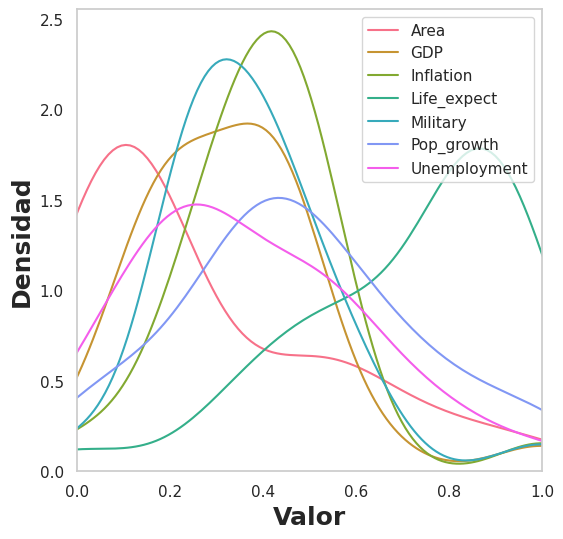

In [ ]:
#se estandariza con min max

X = df.drop(columns=["Country"])


scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

# Se crea un nuevo DataFrame con los datos escalados
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


colores = sns.color_palette("husl", len(variables))
plt.figure(figsize=(6, 6))

for i, variable in enumerate(variables):

    sns.kdeplot(scaled_df[variable], color=colores[i], label=variable)

plt.xlabel('Valor', fontweight='bold', fontsize=18)
plt.ylabel('Densidad', fontweight='bold', fontsize=18)
plt.xlim(0,1)
plt.legend()
plt.grid()
plt.show()

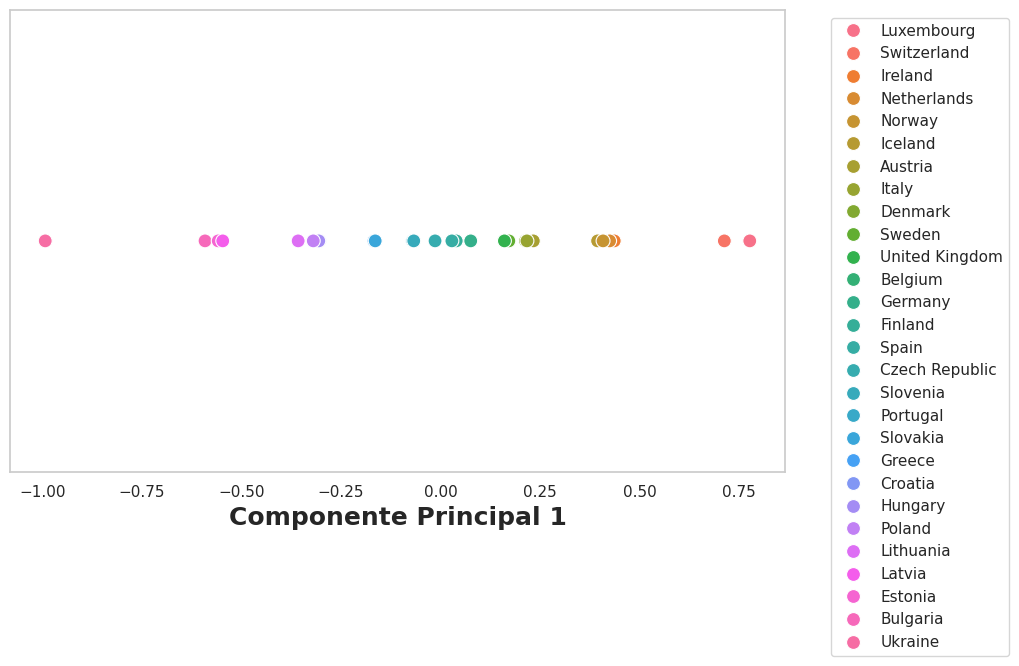

In [ ]:
#se realiza el PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_scaled)

# se crea el  DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1'])
pca_df['Country'] = df['Country']

# Se calcula el promedio del PCA para ordenarlo de menor a mayor
country_order = pca_df.groupby('Country')['PCA1'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y=np.zeros_like(pca_df['PCA1']), data=pca_df, hue='Country',
                hue_order=country_order, s=100)

plt.xlabel('Componente Principal 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

<ipython-input-14-33920ae7e9de>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')


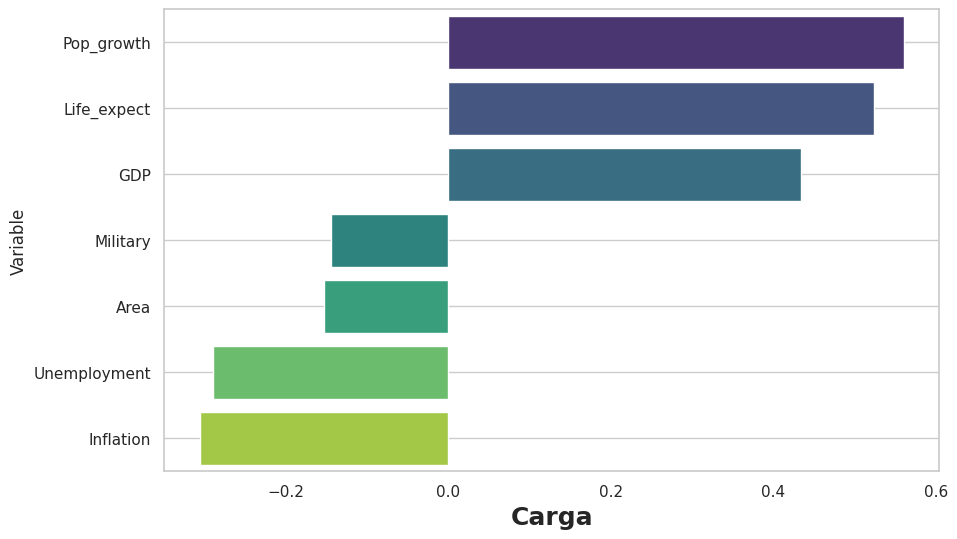

In [ ]:
cargas = pca.components_[0]

# Se Crea un DataFrame para las cargas
cargas_df = pd.DataFrame({'Variable': X.columns, 'Carga': cargas})

cargas_df['Carga'] = cargas_df['Carga']
cargas_df = cargas_df.sort_values(by='Carga', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')
plt.xlabel('Carga', fontweight='bold', fontsize=18)
plt.grid()
plt.show()